In [13]:
from fcmeans import FCM
# from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Load dataset
data = pd.read_csv('../unplugged.csv')
data.head()
data.sample(frac=1)
data = data[0:360]
del data['Comments']

# Assign int values to string
gender = {'M': 1, 'F': 2}
data.Gender = [gender[item] for item in data.Gender]

after = {'F': 0, 'P': 1}
data.Results_After   = [after[item] for item in data.Results_After]

before = {'F': 0, 'P': 1}
data.Results_Before   = [before[item] for item in data.Results_Before]

outcome = {'F': 0, 'T': 1}
data['Positive Outcomes'] = [outcome[item] for item in data['Positive Outcomes']]

print(data.describe())

data =  data[['Age', 'Gender', 'Class', 'Results_Before', 'Results_After','Positive Outcomes']]


              Age      Gender  Results_Before  Results_After       Class  \
count  360.000000  360.000000      360.000000     360.000000  360.000000   
mean     9.616667    1.630556        0.391667       0.752778    4.052778   
std      1.287502    0.483326        0.488802       0.431997    0.619995   
min      7.000000    1.000000        0.000000       0.000000    3.000000   
25%      9.000000    1.000000        0.000000       1.000000    4.000000   
50%     10.000000    2.000000        0.000000       1.000000    4.000000   
75%     10.000000    2.000000        1.000000       1.000000    4.000000   
max     14.000000    2.000000        1.000000       1.000000    5.000000   

       Positive Outcomes  
count         360.000000  
mean            0.433333  
std             0.496225  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             1.000000  
max             1.000000  


         Age    Gender     Class  Results_Before  Results_After  \
0   8.541870  1.648975  3.854821        0.383108       0.759994   
1  11.076359  1.546159  4.429160        0.303715       0.835830   
2   9.558892  1.682314  3.997595        0.473521       0.718740   

   Positive Outcomes  
0           0.446511  
1           0.565390  
2           0.340044  


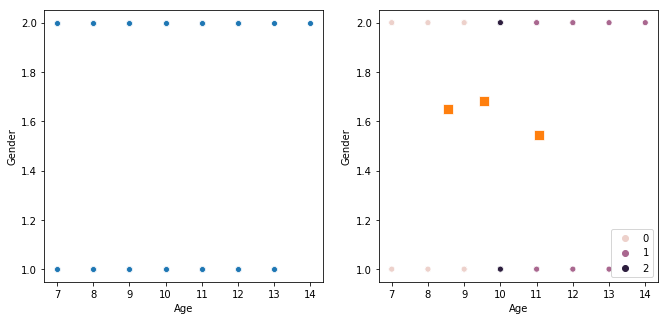

In [16]:

# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(data)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

print (fcm_centers)
# data

# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(data['Age'], data['Gender'], ax=axes[0])
scatter(data['Age'], data['Gender'], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers['Age'], fcm_centers['Gender'], ax=axes[1],marker="s",s=100)
# plt.show()